# Grosse Veränderungen der Lebenserwartung

Gruppe: Karin Moser, Heinz Specht, Markus Specht, Anna Mahler

Fragen
- Welche Länder hatten in den letzten 10 Jahre die grösste Zunahme/Abnahme der Lebenswerten?
- Was sind die Gründe dafür?

Quellen
- https://ourworldindata.org/grapher/life-expectancy?tab=map&time=2021


## 1. Daten beschaffen und laden

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
# loading the data
df = pd.read_csv('life-expectancy.csv', skiprows=1,
                 names=['Gebiet','Code','Jahr','Lebenserwartung']) 
df.head()  

,Gebiet,Code,Jahr,Lebenserwartung
0,Afghanistan,AFG,1950,27.7275
1,Afghanistan,AFG,1951,27.9634
2,Afghanistan,AFG,1952,28.4456
3,Afghanistan,AFG,1953,28.9304
4,Afghanistan,AFG,1954,29.2258


## 2. Daten vorbereiten 
- Die Roh-Daten sind bereits im Long-Format
- Für die Analyse werden die Daten pivotiert: Jede Spalte repräsentiert eine Region, die Zeilen sind die verschiedenen Jahre - in absteigender Reihenfolge.

In [3]:
df_pivot = df.pivot(index='Gebiet', columns='Jahr', values='Lebenserwartung')
df_pivot.head()

Jahr,1543,1548,1553,1558,1563,1568,1573,1578,1583,1588,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Gebiet,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,61.9230,62.4167,62.5451,62.6587,63.1361,63.0160,63.0810,63.5645,62.5751,61.9824
Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,59.8106,60.2924,60.7463,61.1288,61.5880,61.9858,62.3435,62.6880,62.2342,61.6609
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,78.0640,78.1226,78.4075,78.6441,78.8602,79.0473,79.1838,79.2825,76.9893,76.4626
Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,74.2024,74.6153,75.1100,75.6220,75.7318,75.7428,76.0656,76.4742,74.4528,76.3767
American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,72.3202,72.2683,72.3403,72.5220,72.3712,72.4830,72.4915,72.3023,72.4432,72.5398


## 3. Statistik der Roh-Daten (Analyse im Long-Format)

über die einzelnen Spalten kann folgendes ausgesagt werden:
- Die Spalte *Gebiete* enthält 261 verschieden Gebiete
- Die Spalte *Codes* enthält 239 verschiedene Codes
- Es sind Daten zwischen 1543 and 2021 vorhanden. Ab dem Jahr 1950 sind die Daten komplett
- Die Lebenserwartung streut zwischen 12 und 86.5 Jahren

In [4]:
df.dtypes

Gebiet              object
Code                object
Jahr                 int64
Lebenserwartung    float64
dtype: object

### 3.1 Analyse Gebiete

In [5]:
print('Anzahl verschiedener Gebiete: ', len(df['Gebiet'].unique()))

Anzahl verschiedener Gebiete:  261


In [6]:
# Anzahl Datenpunkte pro Gebiet
df['Gebiet'].value_counts()

Gebiet
Sweden                             271
United Kingdom                     240
France                             206
Denmark                            188
Iceland                            184
                                  ... 
Latin America and the Caribbean     72
Least developed countries           72
Zimbabwe                            72
Northern Ireland                    28
USSR                                 2
Name: count, Length: 261, dtype: int64

<Axes: title={'center': 'Anzahl Datenpunkte pro Gebiet'}, xlabel='Gebiet', ylabel='Anzahl Datenpunkte'>

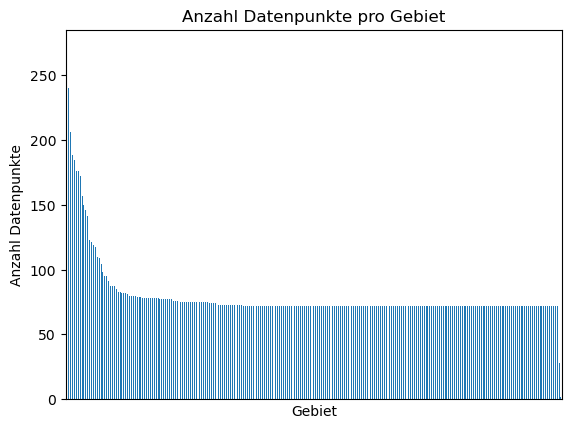

In [7]:
df['Gebiet'].value_counts().plot(kind='bar', 
                                 xticks=[],     # disable labels on x-axis
                                 ylabel='Anzahl Datenpunkte', title='Anzahl Datenpunkte pro Gebiet')

### 3.2 Analyse Codes

In [8]:
print('Anzahl verschiedener Codes: ', len(df['Code'].unique()))

Anzahl verschiedener Codes:  239


In [9]:
# Anzahl Datenpunkte pro Gebiet
df['Code'].value_counts()

Code
SWE         271
GBR         240
FRA         206
DNK         188
ISL         184
           ... 
JOR          72
KIR          72
OWID_KOS     72
ZWE          72
OWID_USS      2
Name: count, Length: 238, dtype: int64

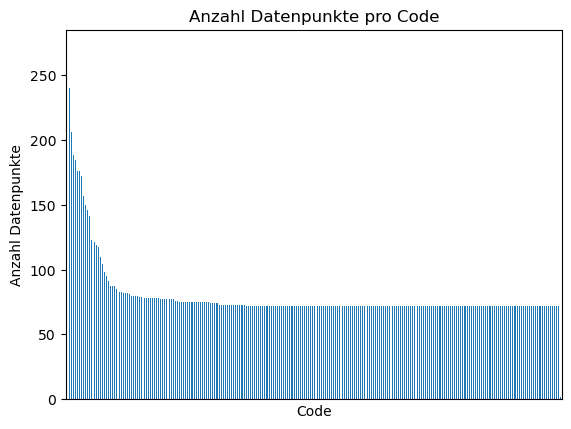

In [10]:
df['Code'].value_counts().plot(kind='bar',xticks=[], ylabel='Anzahl Datenpunkte', title='Anzahl Datenpunkte pro Code');

### 3.3 Analyse Jahr

In [11]:
print('Anzahl verschiedener Jahre: ', len(df['Jahr'].unique()))

Anzahl verschiedener Jahre:  313


In [12]:
# Anzahl Datenpunkte pro Jahr
df['Jahr'].value_counts().sort_index()

Jahr
1543      1
1548      1
1553      1
1558      1
1563      1
       ... 
2017    257
2018    257
2019    257
2020    257
2021    257
Name: count, Length: 313, dtype: int64

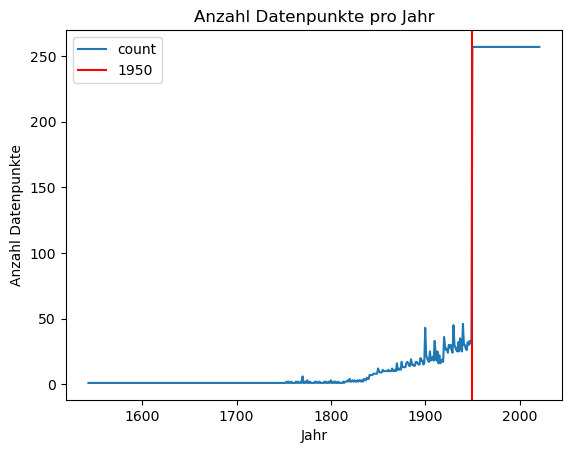

In [13]:
# Jahre mit maximaler Anzahl Datenpunkte (257)
g = df['Jahr'].value_counts().sort_index().plot(ylabel='Anzahl Datenpunkte', title='Anzahl Datenpunkte pro Jahr');
g.axvline(x=1950, color='red',label='1950') # rote Linie bei 1950 - ab hier sind alle Jahre enthalten
g.legend()  # Legende anzeigen

### 3.4 Analyse Lebenserwartung

In [14]:
df.describe()

,Jahr,Lebenserwartung
count,20755.000000,20755.000000
mean,1975.730234,61.617992
std,38.423230,12.917682
min,1543.000000,11.995100
25%,1961.000000,52.185850
50%,1981.000000,64.060000
75%,2001.000000,71.822250
max,2021.000000,86.542400


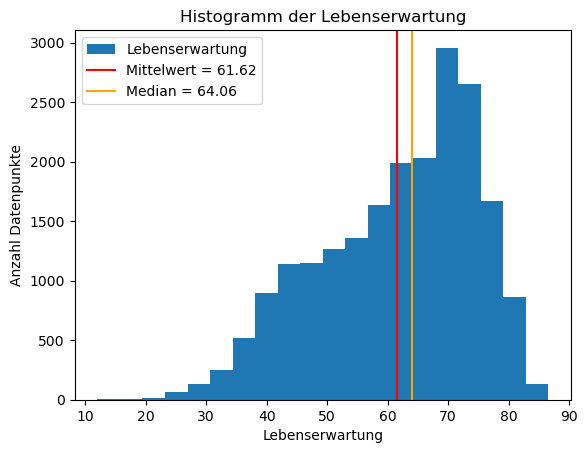

In [15]:
g = df['Lebenserwartung'].plot(kind='hist', bins=20, title='Histogramm der Lebenserwartung', 
                           xlabel='Lebenserwartung', ylabel='Anzahl Datenpunkte')
mean = df['Lebenserwartung'].mean()
g.axvline(x=df['Lebenserwartung'].mean(), color='red',label=f'Mittelwert = {mean:.2f}')  # rote Linie bei Mittelwert

median = df['Lebenserwartung'].median()
g.axvline(x=df['Lebenserwartung'].median(), color='orange',label=  f'Median = {median:.2f}')  # orange Linie bei Median

g.legend()




## 4. Analyse 

### Vorgehen

### Beobachtungen
- Afrikanische Länder sind an der Spitze in der Zunahme der Lebenserwartung. Eine Zunahme der Lebenserwartung von mehr als 5 Jahren haben: Uganda, Tanzania, Malawi, Zimbabwe, Lesotho, Swasiland
- Eine Reduktion der Lebenserwartung von mehr als 4 Jahren haben: Saint Vincent and the Grenadines, Mexiko, Kuba, Oman


### Interpretation

Corona führte bei allen Ländern zu einer Reduktion der Lebenserwartung (siehe Plot)

Länder (in Afrika) mit starker Zunahme der Lebensqualität:
- Bei den afrikanischen Ländern stieg die Lebenserwartung in den letzten Jahren sehr stark, da die Lebenserwartung sehr tief war. Zudem ist der Effekt von Corona auf die Lebenserwartung in den afrikanischen Ländern eher kleiner weil die Bevölkerung jünger ist
- Bei einigen afrikanischen Ländern hat sich die Lebenserwartung zwischen 1990 und 2000 stark verringert wegen HIV. Siehe Beispielsweise: https://life4me.plus/pl/news/life-expectancy-in-zimbabwe-shoots-up-hiv-infection-drop/


Länder mit einer starken Reduktion der Lebensqualität:
- Hier war die Lebenserwartung in den Jahren vor Corona konstant. Corona führte dann zu einer Reduktion der Lebenserwartung


### Berechnungen

In [16]:
diffs = df_pivot[2021]-df_pivot[2011]   # Differenz zwischen 2021 und 2011
diffs = diffs.sort_values().dropna()  # sortieren nach Differenz und NaN-Werte entfernen
diffs

Gebiet
Saint Vincent and the Grenadines   -4.9667
Mexico                             -4.1524
Cuba                               -4.0768
Oman                               -4.0669
Yemen                              -3.6660
                                     ...  
Sierra Leone                        5.4426
Malawi                              5.4497
Zimbabwe                            5.9061
Lesotho                             6.3701
Eswatini                            8.8711
Length: 257, dtype: float64

<Axes: title={'center': 'Grösste und kleinste Differenzen der Lebenserwartung 2011-2021'}, ylabel='Gebiet'>

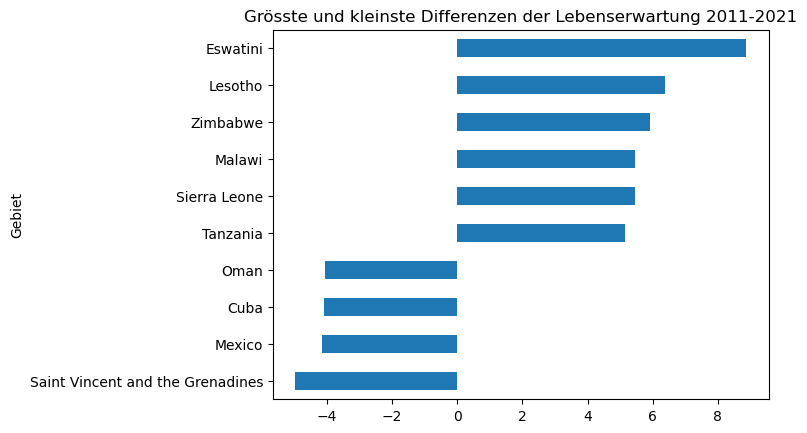

In [17]:
diff_sel = (diffs < -4) | (diffs > 5)  # Auswahl der grössten und kleinsten Differenzen
diffs[diff_sel].plot(kind='barh', title='Grösste und kleinste Differenzen der Lebenserwartung 2011-2021')

In [18]:
Gebiets_liste = diffs[diff_sel].index.tolist()  # Liste der Gebiete mit grössten und kleinsten Differenzen
print(Gebiets_liste)

['Saint Vincent and the Grenadines', 'Mexico', 'Cuba', 'Oman', 'Tanzania', 'Sierra Leone', 'Malawi', 'Zimbabwe', 'Lesotho', 'Eswatini']


### Visualisierung

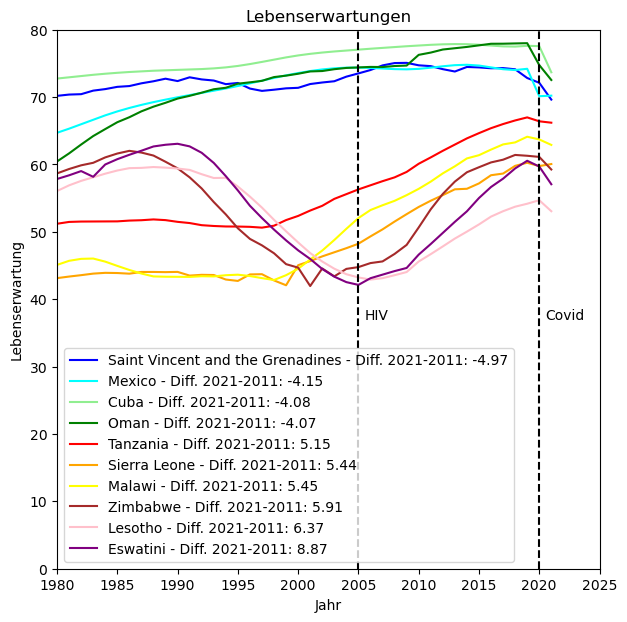

In [19]:
color_dict = {
    'Saint Vincent and the Grenadines': 'blue',
    'Mexico': 'cyan',
    'Cuba': 'lightgreen',
    'Oman': 'green',
    'Tanzania': 'red',
    'Sierra Leone': 'orange',
    'Malawi': 'yellow',
    'Zimbabwe': 'brown',
    'Lesotho': 'pink',
    'Eswatini': 'purple'
}

for gebiet in Gebiets_liste:
    diff = diffs[gebiet]
    g = df_pivot.loc[gebiet].plot(title='Lebenserwartungen', xlabel='Jahr', ylabel=f'Lebenserwartung', legend=True,
                                  label=f'{gebiet} - Diff. 2021-2011: {diff:.2f}', # für die Legende
                                  xlim=[1980,2025], ylim=[0,80],   # x- und y-Achsen begrenzen
                                  color=color_dict[gebiet],        # Farbe aus color_dict
                                  figsize=(7,7))                   # Grösse des Plots

# Covid Pandemie    
g.axvline(x=2020, color='black', linestyle='--') 
g.text(2020.5, 37, 'Covid')  

# HIV Pandemie
g.axvline(x=2005, color='black', linestyle='--')  
g.text(2005.5, 37, 'HIV');